<a href="https://colab.research.google.com/github/mekha1278/codealpha_task/blob/main/codealpha_unemploymentinindia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/Unemployment in India (1).csv")
df.columns = df.columns.str.strip()
print("Cleaned columns:", df.columns)

Cleaned columns: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [2]:
print("Initial data:\n", df.head())
print("\nDataset info:")
df.info()

Initial data:
            Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Dat

In [13]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 State                        28
Date                         28
Frequency                    28
Unemployment_Rate            28
Employed                     28
Labour_Participation_Rate    28
Area                         28
Month                        28
Year                         28
dtype: int64


In [11]:
df.columns = df.columns.str.strip()
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

In [12]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
print(df[['Date', 'Month', 'Year']].head())
print(" Columns after cleaning:", df.columns.tolist())

        Date      Month    Year
0 2019-05-31        May  2019.0
1 2019-06-30       June  2019.0
2 2019-07-31       July  2019.0
3 2019-08-31     August  2019.0
4 2019-09-30  September  2019.0
 Columns after cleaning: ['State', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed', 'Labour_Participation_Rate', 'Area', 'Month', 'Year']


In [8]:
print(df.columns)


Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Month', 'Year'],
      dtype='object')


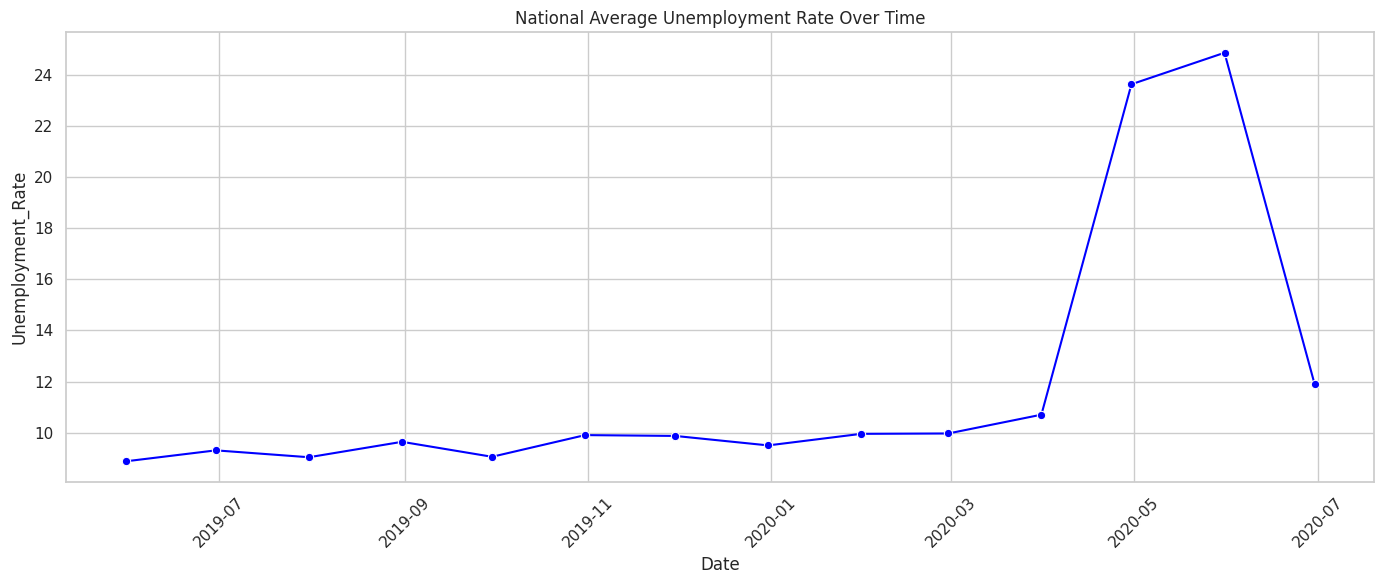

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
national_avg = df.groupby('Date')['Unemployment_Rate'].mean().reset_index()
sns.lineplot(data=national_avg, x='Date', y='Unemployment_Rate', marker="o", color="blue")
plt.title("National Average Unemployment Rate Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

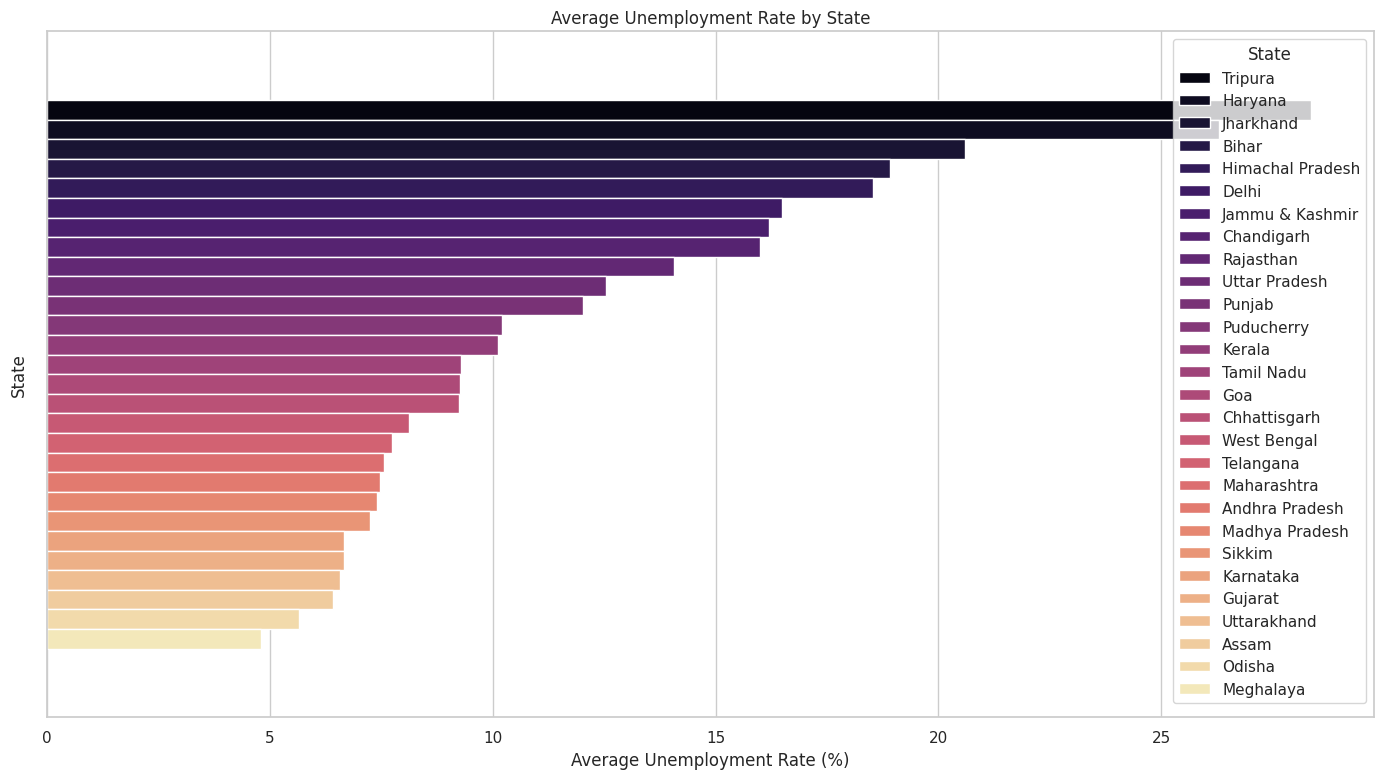

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 8))
state_avg = df.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=state_avg.values, hue=state_avg.index,palette="magma")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("State")
plt.title("Average Unemployment Rate by State")
plt.tight_layout()
plt.show()


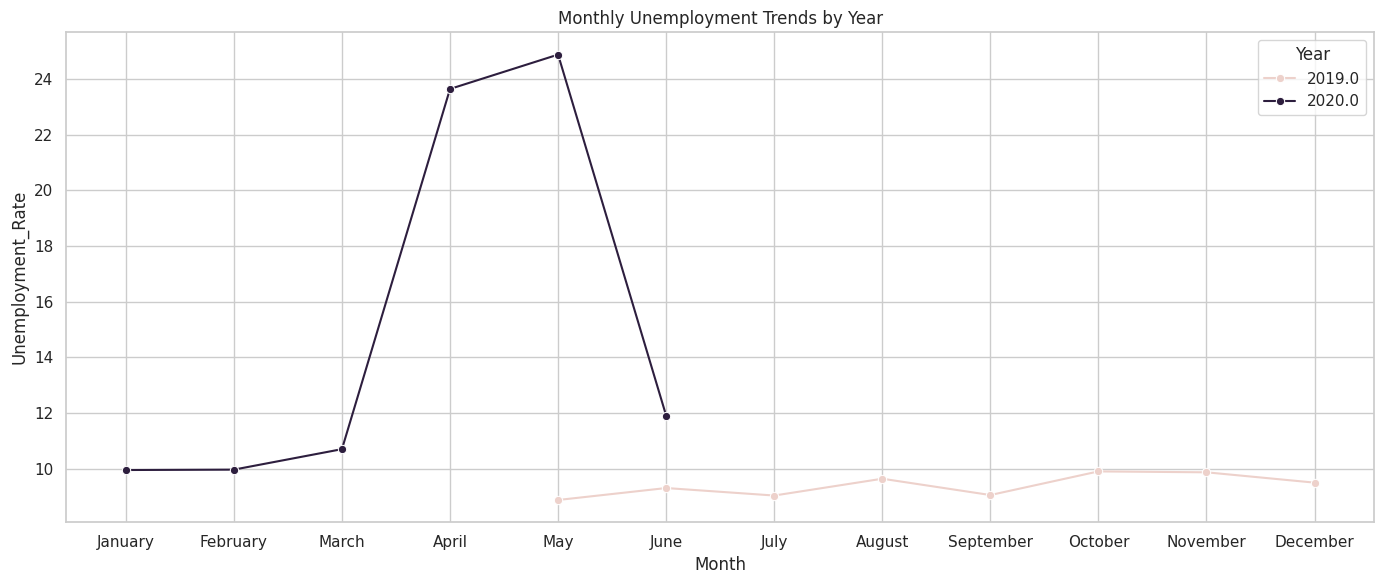

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
monthly_trend = df.groupby(['Year', 'Month'])['Unemployment_Rate'].mean().reset_index()
month_order = pd.date_range("2020-01-01", periods=12, freq='ME').strftime("%B").tolist()
monthly_trend['Month'] = pd.Categorical(monthly_trend['Month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('Month')
sns.lineplot(data=monthly_trend, x='Month', y='Unemployment_Rate', hue='Year', marker="o")
plt.title("Monthly Unemployment Trends by Year")
plt.tight_layout()
plt.show()

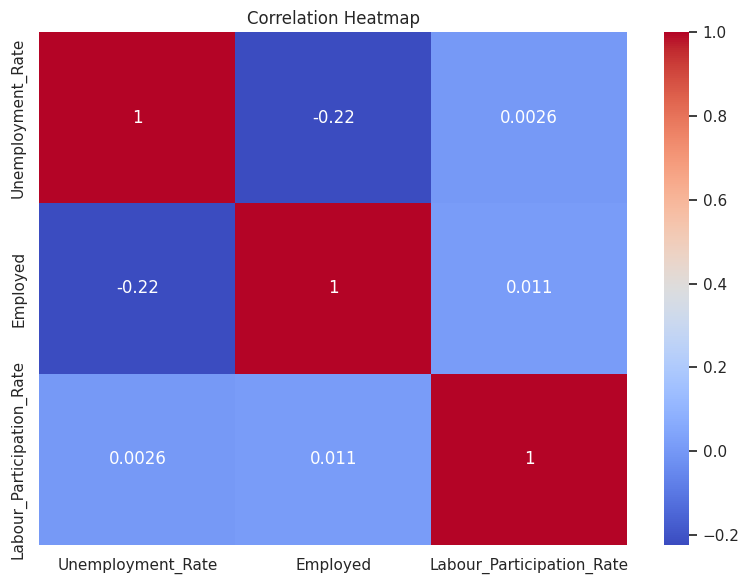

In [23]:
plt.figure(figsize=(8, 6))
corr = df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

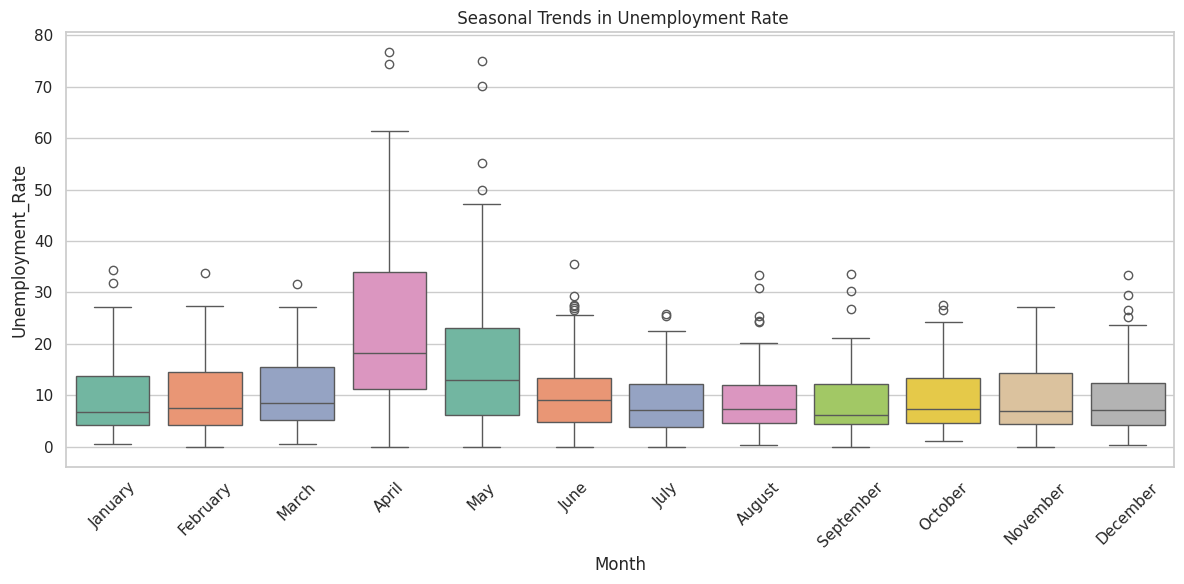

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Unemployment_Rate', hue='Month', palette="Set2", order=month_order, dodge=False, legend=False)
plt.title(" Seasonal Trends in Unemployment Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
